<a href="https://colab.research.google.com/github/Akashno/HeartDiseasePredictor/blob/master/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import warnings



warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn

In [ ]:
#classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
dataset = pd.read_csv("heart.csv")

In [ ]:
# spliting and dividing the dataset 
predictors = dataset.drop("target",axis=1)
target = dataset["target"]
X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

Analysing the splitted data


In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape


(61, 13)

In [ ]:
Y_train.shape


(242,)

In [ ]:
Y_test.shape

(61,)

Analysing the data

In [ ]:
target = dataset['target']

In [ ]:
#analysing the count of people with disease and with out disease in the dataset
seaborn.countplot(target)


In [ ]:
#analysing the sex feature 
seaborn.barplot(dataset["sex"],target)

In [ ]:
#analysing the chest pain feature 
seaborn.barplot(dataset["cp"],target)

In [ ]:
#analysing the fbs feature 
seaborn.barplot(dataset["fbs"],target)

In [ ]:
#analysing the rest ecg feature 
seaborn.barplot(dataset["restecg"],target)

In [ ]:
#analysing the exang feature 
seaborn.barplot(dataset["exang"],target)

In [ ]:
#analysing the slope feature 
seaborn.barplot(dataset["slope"],target)

In [ ]:
#analysing the ca feature 
seaborn.barplot(dataset["ca"],target)

Training the data model


In [ ]:
#logistic regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, Y_train)
LR_prediction = LR_model.predict(X_test)

In [ ]:
# navie bayes model
NB_model = GaussianNB()
NB_model.fit(X_train,Y_train)
NB_prediction = NB_model.predict(X_test)

In [ ]:
# support vector machine
SV_model = svm.SVC(kernel='linear')
SV_model.fit(X_train, Y_train)
SV_prediction = SV_model.predict(X_test)

In [ ]:
# k nearest neighbors model
KNN_model = KNeighborsClassifier(n_neighbors=7)
KNN_model.fit(X_train,Y_train)
KNN_prediction=KNN_model.predict(X_test)

In [ ]:
# Decision tree model
max_accuracy = 0
for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
DT_model = DecisionTreeClassifier(random_state=best_x)
DT_model.fit(X_train,Y_train)
DT_prediction = DT_model.predict(X_test)

In [ ]:
#random forest model
max_accuracy = 0
for x in range(2000):
    RF_model = RandomForestClassifier(random_state=x)
    RF_model.fit(X_train,Y_train)
    Y_pred_rf = RF_model.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
RF_model = RandomForestClassifier(random_state=best_x)
RF_model.fit(X_train,Y_train)
RF_prediction = RF_model.predict(X_test)

Accuray score analyse


In [ ]:
#checking the accuracy score
LR_score = round(accuracy_score(LR_prediction,Y_test)*100,2)
NB_score = round(accuracy_score(NB_prediction,Y_test)*100,2)
SV_score = round(accuracy_score(SV_prediction,Y_test)*100,2)
KNN_score = round(accuracy_score(KNN_prediction,Y_test)*100,2)
DT_score = round(accuracy_score(DT_prediction,Y_test)*100,2)
RF_score = round(accuracy_score(RF_prediction,Y_test)*100,2)


LR's accuracy score is :85.25%
NB's accuracy score is :85.25%
SVm's accuracy score is :81.97%
KNN's accuracy score is :67.21%
DT's accuracy score is :81.97%
RF's accuracy score is :90.16%


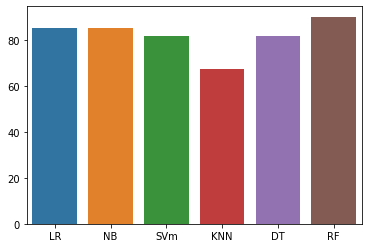

In [ ]:
scores = [LR_score,NB_score,SV_score,KNN_score,DT_score,RF_score]
algorithms = ["LR","NB","SVm","KNN","DT","RF"]
for i in range(len(algorithms)):
  print(algorithms[i]+"'s accuracy score is :"+str(scores[i]) + "%")    
seaborn.barplot(algorithms,scores)